In [10]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

#Setup
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [11]:
print(mnist.train.labels.shape,mnist.validation.labels.shape,mnist.test.labels.shape)

(55000, 10) (5000, 10) (10000, 10)


In [12]:
mnist.validation.labels[388,:]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.])

In [13]:
D = 784 # dimensionality
K = 10 # number of classes
X_train = np.zeros((55000,D))
y_train = np.zeros((55000,K), dtype=np.int)



In [14]:
# split data into 80-20
from sklearn import cross_validation

X_tr, X_ts, y_tr, y_ts,X_vl,y_vl = mnist.train.images, mnist.test.images, mnist.train.labels, mnist.test.labels, mnist.validation.images, mnist.validation.labels
X1=np.concatenate((X_tr, X_vl),axis=0)
y1=np.concatenate((y_tr, y_vl),axis=0)
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X1, y1, test_size=0.2)

# from sklearn.cross_validation import KFold
# from sklearn import cross_validation

# kf = KFold(60000, n_folds=5,shuffle=True)

# for train_index, val_index in kf:
# #     print("TRAIN:", train_index, "VAL:", val_index)
#     X_train, X_val = X1[train_index], X1[val_index]
#     y_train, y_val = y1[train_index], y1[val_index]


#     print(y_train.shape,y_val.shape,X_train.shape)


y_train1=np.zeros((48000,1),dtype='uint8')
# y_val1=np.zeros((12000,1),dtype='uint8')
y_test1=np.zeros((12000,1),dtype='uint8')


for j in range(48000):
    for i in range(9):
        if y_train[j,i]==1:
            y_train1[j]=i
for j in range(12000):
    for i in range(9):
        if y_test[j,i]==1:
            y_test1[j]=i

print(y_train1.shape,y_test1.shape)

IndexError: index 30000 is out of bounds for axis 0 with size 30000

In [15]:
# split data into 80-20
from sklearn import cross_validation

X_tr, X_ts, y_tr, y_ts,X_vl,y_vl = mnist.train.images, mnist.test.images, mnist.train.labels, mnist.test.labels, mnist.validation.images, mnist.validation.labels
X1=np.concatenate((X_tr, X_vl),axis=0)
y1=np.concatenate((y_tr, y_vl),axis=0)
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X1, y1, test_size=0.5)

# from sklearn.cross_validation import KFold
# from sklearn import cross_validation

# kf = KFold(60000, n_folds=5,shuffle=True)

# for train_index, val_index in kf:
# #     print("TRAIN:", train_index, "VAL:", val_index)
#     X_train, X_val = X1[train_index], X1[val_index]
#     y_train, y_val = y1[train_index], y1[val_index]


#     print(y_train.shape,y_val.shape,X_train.shape)


y_train1=np.zeros((30000,1),dtype='uint8')
# y_val1=np.zeros((12000,1),dtype='uint8')
y_test1=np.zeros((30000,1),dtype='uint8')


for j in range(30000):
    for i in range(9):
        if y_train[j,i]==1:
            y_train1[j]=i
for j in range(30000):
    for i in range(9):
        if y_test[j,i]==1:
            y_test1[j]=i

print(y_train1.shape,y_test1.shape)

(30000, 1) (30000, 1)


In [16]:
# Linear model

# Start with an initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# Initial values from hyperparameter
reg = 1e-3 # regularization strength

#For simplicity, we will not optimize this using grid search here.b#Perform batch SGD using backprop

#For simplicity we will take the batch size to be the same as number of examples
# num_examples = X_train.shape[0]


#Initial value for the Gradient Descent Parameter
step_size = 1e-2 #Also called learning rate

#For simplicity, we will not hand tune this algorithm parameter as well.


In [20]:

# Xtt=X_train[0:15000,:]
# ytt=y_train1[0:15000,:]
Xtt=X_train[15001:30000,:]
ytt=y_train1[15001:30000,:]
num_examples = Xtt.shape[0]
# gradient descent loop
for i in range(100):
  
    # evaluate class scores, [N x K]
    scores = np.dot(Xtt, W) + b 
  
    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = (exp_scores / np.sum(exp_scores, axis=1, keepdims=True))/1000 # [N x K]

  
#     # compute the loss: average cross-entropy loss and regularization
    corect_logprobs = -np.log(probs[range(num_examples),ytt])
#     corect_logprobs = -np.log(probs[np.random.randint(0,X_train.shape[0],num_examples),y_train1])
    data_loss = np.sum(corect_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W)
    loss = data_loss + reg_loss
    
    if i % 10 == 0:
        print("iteration:",i, " loss:",loss)
       
  
#     # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples),ytt] -= 1
    dscores /= num_examples
  
    # backpropate the gradient to the parameters (W,b)
    dW = np.dot(Xtt.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)
  
    dW += reg*W # regularization gradient
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db

iteration: 0  loss: 136608.260565
iteration: 10  loss: 136608.272868
iteration: 20  loss: 136608.288339
iteration: 30  loss: 136608.306966
iteration: 40  loss: 136608.328746
iteration: 50  loss: 136608.353676
iteration: 60  loss: 136608.381754
iteration: 70  loss: 136608.41298
iteration: 80  loss: 136608.447353
iteration: 90  loss: 136608.484872


In [36]:
#4.4- cross val

kf_train_acc=[]
kf_val_acc=[]


from sklearn.cross_validation import KFold
from sklearn import cross_validation

kf = KFold(60000, n_folds=5,shuffle=True)

for train_index, val_index in kf:
#     print("TRAIN:", train_index, "VAL:", val_index)
    X_train, X_val = X1[train_index], X1[val_index]
    y_train, y_val = y1[train_index], y1[val_index]


#     print(y_train.shape,y_val.shape,X_train.shape)


    y_train1=np.zeros((48000,1),dtype='uint8')
    y_val1=np.zeros((12000,1),dtype='uint8')

    for j in range(48000):
        for i in range(9):
            if y_train[j,i]==1:
                y_train1[j]=i
    for j in range(12000):
        for i in range(9):
            if y_val[j,i]==1:
                y_val1[j]=i
#     Xtt=X_train[0:24000,:]
#     ytt=y_train1[0:24000,:]
    Xtt=X_train[24001:48000,:]
    ytt=y_train1[24001:48000,:]
    num_examples = Xtt.shape[0]
    # gradient descent loop
    for i in range(50):

        # evaluate class scores, [N x K]
        scores = np.dot(Xtt, W) + b 

        # compute the class probabilities
        exp_scores = np.exp(scores)
        probs = (exp_scores / np.sum(exp_scores, axis=1, keepdims=True))/1000 # [N x K]


    #     # compute the loss: average cross-entropy loss and regularization
        corect_logprobs = -np.log(probs[range(num_examples),ytt])
    #     corect_logprobs = -np.log(probs[np.random.randint(0,X_train.shape[0],num_examples),y_train1])
        data_loss = np.sum(corect_logprobs)/num_examples
        reg_loss = 0.5*reg*np.sum(W*W)
        loss = data_loss + reg_loss

        if i % 20 == 0:
            print("iteration:",i, " loss:",loss)

    #     # compute the gradient on scores
        dscores = probs
        dscores[range(num_examples),ytt] -= 1
        dscores /= num_examples

        # backpropate the gradient to the parameters (W,b)
        dW = np.dot(Xtt.T, dscores)
        db = np.sum(dscores, axis=0, keepdims=True)

        dW += reg*W # regularization gradient

        # perform a parameter update
        W += -step_size * dW
        b += -step_size * db
    
    scores = np.dot(Xtt, W) + b
    predicted_class = np.argmax(scores, axis=1)
    print("train accuracy:",(np.mean(predicted_class == ytt)))
    kf_train_acc.append(np.mean(predicted_class == ytt))
    
    scores = np.dot(X_val, W) + b
    predicted_class = np.argmax(scores, axis=1)
    print("val accuracy:",(np.mean(predicted_class == y_val1)))
    kf_val_acc.append(np.mean(predicted_class == y_val1))

print("cross validation-train acc:",np.mean(kf_train_acc),"cross validation-val acc:",np.mean(kf_val_acc))

iteration: 0  loss: 218497.285311
iteration: 20  loss: 218497.477383
iteration: 40  loss: 218497.681808
train accuracy: 0.113359284952
val accuracy: 0.112471666667
iteration: 0  loss: 218496.226326
iteration: 20  loss: 218496.450873
iteration: 40  loss: 218496.687783
train accuracy: 0.113207947688
val accuracy: 0.113914923611
iteration: 0  loss: 218499.082558
iteration: 20  loss: 218499.335792
iteration: 40  loss: 218499.601371
train accuracy: 0.112888386336
val accuracy: 0.113775034722
iteration: 0  loss: 218497.643296
iteration: 20  loss: 218497.930338
iteration: 40  loss: 218498.229755
train accuracy: 0.113322896503
val accuracy: 0.112557458333
iteration: 0  loss: 218499.256514
iteration: 20  loss: 218499.572996
iteration: 40  loss: 218499.901803
train accuracy: 0.112857894212
val accuracy: 0.113516861111
cross validation-train acc: 0.113127281938 cross validation-val acc: 0.113247188889


iteration: 0  loss: 0.221411056305
iteration: 5  loss: 0.221411056305
test accuracy: 0.0971209305556
train accuracy: 0.0945070885417
iteration: 0  loss: 0.221411056305
iteration: 5  loss: 0.219919693177
test accuracy: 0.0974006388889
train accuracy: 0.0947496909722
iteration: 0  loss: 0.220752863204
iteration: 5  loss: 0.225391656145
test accuracy: 0.0974027777778
train accuracy: 0.0947526857639
iteration: 0  loss: 0.233276313747
iteration: 5  loss: 0.251029963412
test accuracy: 0.0974062708333
train accuracy: 0.0947624322917
iteration: 0  loss: 0.275880884438
iteration: 5  loss: 0.32004894346
test accuracy: 0.0974032638889
train accuracy: 0.0947772065972
iteration: 0  loss: 0.376819518734
iteration: 5  loss: 0.465493986155
test accuracy: 0.097421375
train accuracy: 0.0948041284722
iteration: 0  loss: 0.573833486262
iteration: 5  loss: 0.729778802468
test accuracy: 0.0974404166667
train accuracy: 0.0948467395833
iteration: 0  loss: 0.913995314429
iteration: 5  loss: 1.16461360373
test 

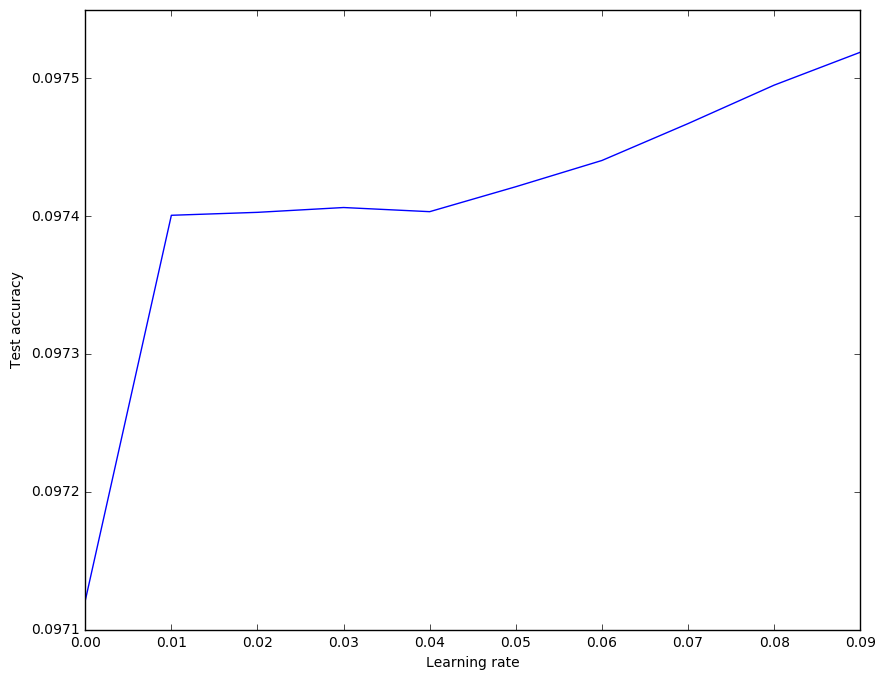

In [57]:
#4.5

Xtt=X_train[0:24000,:]
ytt=y_train1[0:24000,:]
# Xtt=X_train[24001:48000,:]
# ytt=y_train1[24001:48000,:]
num_examples = Xtt.shape[0]
tr_acc=[]
ts_acc=[]
stp_arr=np.arange(0.0,0.1,0.01) 
#(0.01,0.1,0.01)        (0.001,0.01,0.001)
for step_size in np.arange(0.0,0.1,0.01)  :
    


    # gradient descent loop
    for i in range(10):

        # evaluate class scores, [N x K]
        scores = np.dot(Xtt, W) + b 

        # compute the class probabilities
        exp_scores = np.exp(scores)
        probs = (exp_scores / np.sum(exp_scores, axis=1, keepdims=True))/1000 # [N x K]


    #     # compute the loss: average cross-entropy loss and regularization
        corect_logprobs = -np.log(probs[range(num_examples),ytt])
    #     corect_logprobs = -np.log(probs[np.random.randint(0,X_train.shape[0],num_examples),y_train1])
        data_loss = (np.sum(corect_logprobs)/num_examples)/1000000
        reg_loss = 0.5*reg*np.sum(W*W)
        loss = data_loss + reg_loss

        if i % 5 == 0:
            print("iteration:",i, " loss:",loss)


    #     # compute the gradient on scores
        dscores = probs
        dscores[range(num_examples),ytt] -= 1
        dscores /= num_examples

        # backpropate the gradient to the parameters (W,b)
        dW = np.dot(Xtt.T, dscores)
        db = np.sum(dscores, axis=0, keepdims=True)

        dW += reg*W # regularization gradient

        # perform a parameter update
        W += -step_size * dW
        b += -step_size * db
        
    scores = np.dot(X_test, W) + b
    predicted_class = np.argmax(scores, axis=1)
    print("test accuracy:",(np.mean(predicted_class == y_test1)))
    ts_acc1=np.mean(predicted_class == y_test1)
    ts_acc.append(ts_acc1)
    
    scores = np.dot(Xtt, W) + b
    predicted_class = np.argmax(scores, axis=1)
    print("train accuracy:",(np.mean(predicted_class == ytt)))
    tr_acc1=np.mean(predicted_class == ytt)
    tr_acc.append(tr_acc1)
    
plt.plot(stp_arr,ts_acc)
plt.ylabel('Test accuracy')
plt.xlabel('Learning rate')
plt.show()

test accuracy: 0.0904121111111
train accuracy: 0.09158395
test accuracy: 0.100321861111
train accuracy: 0.10093267
test accuracy: 0.100319222222
train accuracy: 0.1009319
test accuracy: 0.100318340278
train accuracy: 0.10093447
test accuracy: 0.100317694444
train accuracy: 0.10093145
test accuracy: 0.100320631944
train accuracy: 0.10093248
test accuracy: 0.10032275
train accuracy: 0.1009276
test accuracy: 0.100321715278
train accuracy: 0.10093146
test accuracy: 0.100321215278
train accuracy: 0.1009322
test accuracy: 0.100317840278
train accuracy: 0.1009307


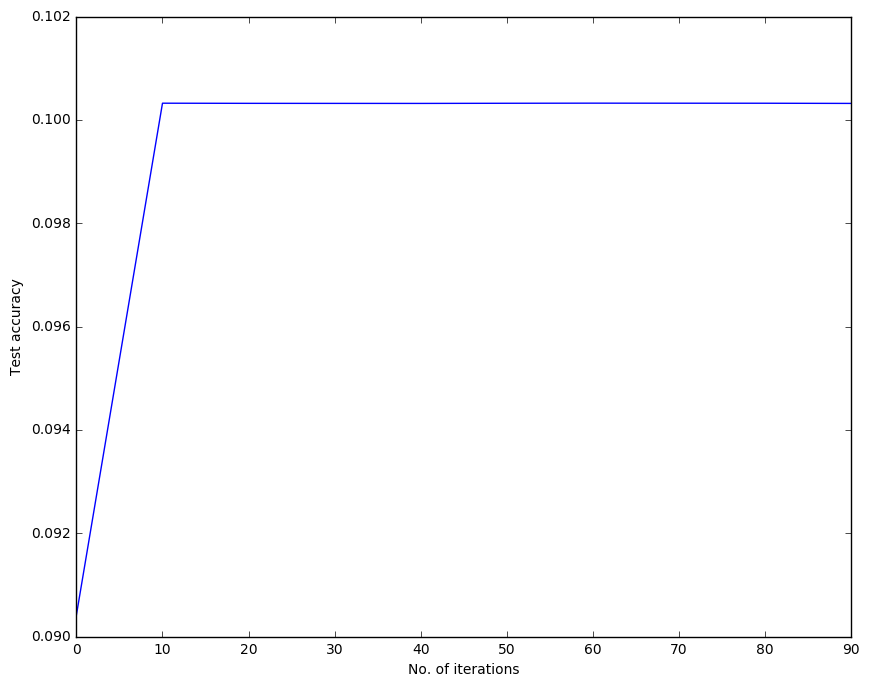

In [8]:
#4.5b
# Linear model

# Start with an initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# Initial values from hyperparameter
reg = 1e-3 # regularization strength

#For simplicity, we will not optimize this using grid search here.b#Perform batch SGD using backprop

#For simplicity we will take the batch size to be the same as number of examples
# num_examples = X_train.shape[0]


#Initial value for the Gradient Descent Parameter
step_size = 1e-2 #Also called learning rate

#For simplicity, we will not hand tune this algorithm parameter as well.


Xtt=X_train[0:10000,:]
ytt=y_train1[0:10000,:]
# Xtt=X_train[24001:48000,:]
# ytt=y_train1[24001:48000,:]
num_examples = Xtt.shape[0]
tr_acc=[]
ts_acc=[]
iter_arr=np.arange(0,100,10)
for iter in np.arange(0,100,10):
    


    # gradient descent loop
    for i in range(iter):

        # evaluate class scores, [N x K]
        scores = np.dot(Xtt, W) + b 

        # compute the class probabilities
        exp_scores = np.exp(scores)
        probs = (exp_scores / np.sum(exp_scores, axis=1, keepdims=True))/1000 # [N x K]


    #     # compute the loss: average cross-entropy loss and regularization
        corect_logprobs = -np.log(probs[range(num_examples),ytt])
    #     corect_logprobs = -np.log(probs[np.random.randint(0,X_train.shape[0],num_examples),y_train1])
        data_loss = (np.sum(corect_logprobs)/num_examples)/1000000
        reg_loss = 0.5*reg*np.sum(W*W)
        loss = data_loss + reg_loss

#         if i % 100 == 0:
#             print("iteration:",i, " loss:",loss)


    #     # compute the gradient on scores
        dscores = probs
        dscores[range(num_examples),ytt] -= 1
        dscores /= num_examples

        # backpropate the gradient to the parameters (W,b)
        dW = np.dot(Xtt.T, dscores)
        db = np.sum(dscores, axis=0, keepdims=True)

        dW += reg*W # regularization gradient

        # perform a parameter update
        W += -step_size * dW
        b += -step_size * db
        
    scores = np.dot(X_test, W) + b
    predicted_class = np.argmax(scores, axis=1)
    print("test accuracy:",(np.mean(predicted_class == y_test1)))
    ts_acc1=np.mean(predicted_class == y_test1)
    ts_acc.append(ts_acc1)
    
    scores = np.dot(Xtt, W) + b
    predicted_class = np.argmax(scores, axis=1)
    print("train accuracy:",(np.mean(predicted_class == ytt)))
    tr_acc1=np.mean(predicted_class == ytt)
    tr_acc.append(tr_acc1)
    
plt.plot(iter_arr,ts_acc)
plt.ylabel('Test accuracy')
plt.xlabel('No. of iterations')
plt.show()

test accuracy: 0.101882714444
train accuracy: 0.10267539
test accuracy: 0.101881557778
train accuracy: 0.10267491
test accuracy: 0.101880506667
train accuracy: 0.10267224
test accuracy: 0.101880291111
train accuracy: 0.1026694
test accuracy: 0.101881341111
train accuracy: 0.10266877
test accuracy: 0.101888774444
train accuracy: 0.10266526
test accuracy: 0.101903664444
train accuracy: 0.10268501
test accuracy: 0.101910695556
train accuracy: 0.10268154
test accuracy: 0.101914225556
train accuracy: 0.10269659
test accuracy: 0.101919116667
train accuracy: 0.10270512


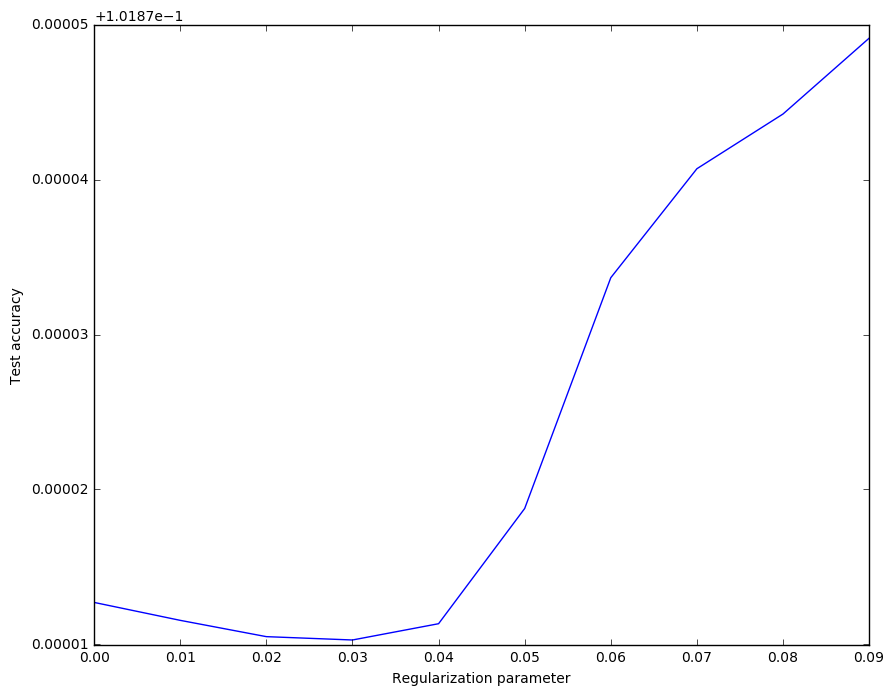

In [21]:
#4.6
# Linear model

# Start with an initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# Initial values from hyperparameter
reg = 1e-3 # regularization strength

#For simplicity, we will not optimize this using grid search here.b#Perform batch SGD using backprop

#For simplicity we will take the batch size to be the same as number of examples
# num_examples = X_train.shape[0]


#Initial value for the Gradient Descent Parameter
step_size = 1e-2 #Also called learning rate

#For simplicity, we will not hand tune this algorithm parameter as well.


Xtt=X_train[0:10000,:]
ytt=y_train1[0:10000,:]
# Xtt=X_train[24001:48000,:]
# ytt=y_train1[24001:48000,:]
num_examples = Xtt.shape[0]
tr_acc=[]
ts_acc=[]
reg_arr=np.arange(0,0.1,0.01)
for reg in np.arange(0,0.1,0.01):
#     print (iter)
    for i in range(50):

        # evaluate class scores, [N x K]
        scores = np.dot(Xtt, W) + b 

        # compute the class probabilities
        exp_scores = np.exp(scores)
        probs = (exp_scores / np.sum(exp_scores, axis=1, keepdims=True))/1000 # [N x K]


    #     # compute the loss: average cross-entropy loss and regularization
        corect_logprobs = -np.log(probs[range(num_examples),ytt])
    #     corect_logprobs = -np.log(probs[np.random.randint(0,X_train.shape[0],num_examples),y_train1])
        data_loss = (np.sum(corect_logprobs)/num_examples)/1000000
        reg_loss = 0.5*reg*np.sum(W*W)
        loss = data_loss + reg_loss

#         if i % 100 == 0:
#             print("iteration:",i, " loss:",loss)


    #     # compute the gradient on scores
        dscores = probs
        dscores[range(num_examples),ytt] -= 1
        dscores /= num_examples

        # backpropate the gradient to the parameters (W,b)
        dW = np.dot(Xtt.T, dscores)
        db = np.sum(dscores, axis=0, keepdims=True)

        dW += reg*W # regularization gradient

        # perform a parameter update
        W += -step_size * dW
        b += -step_size * db
        
    scores = np.dot(X_test, W) + b
    predicted_class = np.argmax(scores, axis=1)
    print("test accuracy:",(np.mean(predicted_class == y_test1)))
    ts_acc1=np.mean(predicted_class == y_test1)
    ts_acc.append(ts_acc1)
    
    scores = np.dot(Xtt, W) + b
    predicted_class = np.argmax(scores, axis=1)
    print("train accuracy:",(np.mean(predicted_class == ytt)))
    tr_acc1=np.mean(predicted_class == ytt)
    tr_acc.append(tr_acc1)
    
plt.plot(reg_arr,ts_acc)
plt.ylabel('Test accuracy')
plt.xlabel('Regularization parameter')
plt.show()

In [ ]:
a=[0.10267539000000001, 0.10267490999999999, 0.10267224, 0.10266939999999999, 0.10266877000000001, 0.10266525999999999, 0.10268500999999999, 0.10268154, 0.10269659, 0.10270512] 
b=[ 0, 0.01, 0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09]
# a=[11,12,14,15,16,17,13,19,18,33]
print(b,a)
plt.plot(b,a)
# plt.ylabel('Test accuracy')
# plt.xlabel('Regularization parameter')
plt.show()

In [19]:
# Post-training: evaluate test set accuracy

#For simplicity, we will use training data as proxy for test. Do not do this.


scores = np.dot(X_test, W) + b
predicted_class = np.argmax(scores, axis=1)
print("test accuracy:",(np.mean(predicted_class == y_test1)))

test accuracy: 0.107596631111


In [18]:
scores = np.dot(Xtt, W) + b
predicted_class = np.argmax(scores, axis=1)
print("train accuracy:",(np.mean(predicted_class == ytt)))

train accuracy: 0.10653696


In [38]:
scores = np.dot(X_train, W) + b
predicted_class = np.argmax(scores, axis=1)
print("train accuracy:",(np.mean(predicted_class == y_train1)))

train accuracy: 0.11317321224


(-1.9195589456423083, 1.9204410543576951)

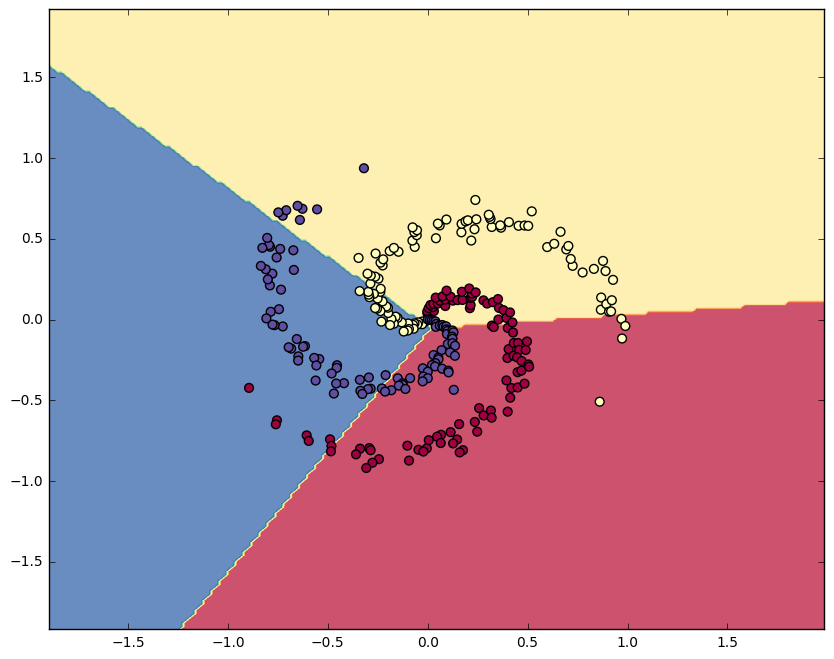

In [36]:
# Post training: plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_linear.png')